In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [47]:

df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [48]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [49]:
x = df.drop(columns = ['median_house_value'])
y = df['median_house_value']


In [50]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc = StandardScaler()
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25)
sc.fit(xtrain)
sc_xtrain = sc.transform(xtrain)
sc_xtest = sc.transform(xtest)


In [51]:
model = Sequential()
model.add(Dense(12,activation='relu',input_dim = 8))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))


In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [57]:
from keras.optimizers import SGD
# model.evaluate(sc_xtrain,ytrain,batch_size=10,epochs = )
model.compile(loss = 'mean_absolute_error',optimizer= SGD(),metrics=['accuracy'])


In [58]:
history = model.fit(sc_xtrain,ytrain,epochs= 25,batch_size=10)

Epoch 1/25
1275/1275 [==============================] - 2s 953us/step - loss: 89467.2057 - accuracy: 0.0000e+00
Epoch 2/25
1275/1275 [==============================] - 1s 999us/step - loss: 88050.5829 - accuracy: 0.0000e+00
Epoch 3/25
1275/1275 [==============================] - 1s 965us/step - loss: 89080.1480 - accuracy: 0.0000e+00
Epoch 4/25
1275/1275 [==============================] - 1s 956us/step - loss: 89241.8872 - accuracy: 0.0000e+00
Epoch 5/25
1275/1275 [==============================] - 1s 964us/step - loss: 88962.2618 - accuracy: 0.0000e+00
Epoch 6/25
1275/1275 [==============================] - 1s 946us/step - loss: 89389.1690 - accuracy: 0.0000e+00
Epoch 7/25
1275/1275 [==============================] - 1s 972us/step - loss: 89435.4475 - accuracy: 0.0000e+00
Epoch 8/25
1275/1275 [==============================] - 1s 957us/step - loss: 88758.5995 - accuracy: 0.0000e+00
Epoch 9/25
1275/1275 [==============================] - 1s 972us/step - loss: 88520.1208 - accuracy: 0.0

In [55]:
loss,acc = model.evaluate(sc_xtrain,sc_xtrain)

399/399 [==============================] - 0s 852us/step - loss: 176073.8906 - mse: 31002134528.0000


In [56]:
loss,acc

(176073.890625, 31002134528.0)

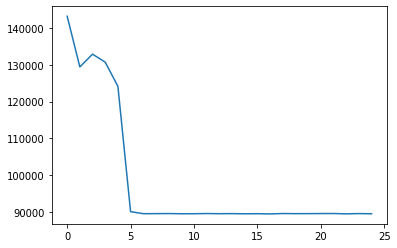

In [19]:
plt.plot(history.history['loss'])

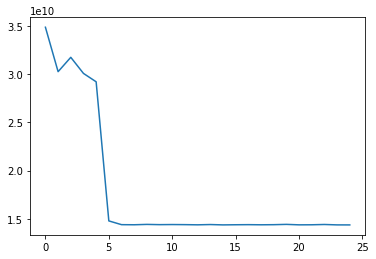

In [20]:
plt.plot(history.history['mse'])


In [45]:
ypred = model.predict(sc_xtrain)
ypred

array([[175984.56],
       [175984.56],
       [175984.56],
       ...,
       [175984.56],
       [175984.56],
       [175984.56]], dtype=float32)

In [35]:
ytest

6387     117700.0
5879     118100.0
15844    275000.0
6405      89800.0
7138     282100.0
           ...   
2830     251300.0
6964     115200.0
8676     500001.0
15358    182600.0
6411      95400.0
Name: median_house_value, Length: 4250, dtype: float64

In [44]:
result = pd.DataFrame({'Actual':ytest,'Predicted':ypred.flatten()})
result

,Actual,Predicted
6387,117700.0,175984.5625
5879,118100.0,175984.5625
15844,275000.0,175984.5625
6405,89800.0,175984.5625
7138,282100.0,175984.5625
...,...,...
2830,251300.0,175984.5625
6964,115200.0,175984.5625
8676,500001.0,175984.5625
15358,182600.0,175984.5625


In [37]:
ytest.shape,ypred.shape

((4250,), (4250, 1))